**Librerías**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

# **Obtención de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Los datos se importan desde una carpeta de google drive
data = pd.read_csv('/content/drive/MyDrive/Curso Data Science/Desafío 15/Set de datos/data.csv')

# **Limpieza y preparación de datos**

In [ ]:
#Visualización de los datos tal como fueron descargados de la fuente
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Preparación de los datos para su posterior análisis
data = data.drop(columns = ["id"]) #no es una columna que sirva para el análisis
data.rename(columns = {"diagnosis": "diagnóstico","radius_mean":"radio medio",	"texture_mean":"textura media", "perimeter_mean":"perímetro medio",	"area_mean":"área media",
                       "smoothness_mean":"suavidad media", "compactness_mean":"compactibilidad media",	"concavity_mean":"concavidad media",
                       "concave points_mean":"puntos_cóncavos medios", "symmetry_mean":"simetría media","fractal_dimension_mean":"dimensión_fractal media",
                       "radius_se":"radio se", "texture_se":"textura se", "perimeter_se":"perímetro se",	"area_se":"área se",
                       "smoothness_se":"suavidad se", "compactness_se":"compactibilidad se",	"concavity_se":"concavidad se",
                       "concave points_se":"puntos_cóncavos se", "symmetry_se":"simetría se","fractal_dimension_se":"dimensión_fractal se",
                       "radius_worst":"peor radio","texture_worst":"peor textura", "perimeter_worst":"peor perímetro",	"area_worst":"peor área",
                       "smoothness_worst":"peor suavidad", "compactness_worst":"peor compactibilidad",	"concavity_worst":"peor concavidad",
                       "concave points_worst":"peores puntos_cóncavos", "symmetry_worst":"peor simetría","fractal_dimension_worst":"peor dimensión_fractal",}, inplace = True)

In [ ]:
data.diagnóstico.unique()

array(['M', 'B'], dtype=object)

In [ ]:
#Mapeo de la variable diagnóstico para que sea cuantitativa y poder aplicar los modelos de machine learning
data["diagnóstico"] = data["diagnóstico"].map({'M':1,'B':0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnóstico              569 non-null    int64  
 1   radio medio              569 non-null    float64
 2   textura media            569 non-null    float64
 3   perímetro medio          569 non-null    float64
 4   área media               569 non-null    float64
 5   suavidad media           569 non-null    float64
 6   compactibilidad media    569 non-null    float64
 7   concavidad media         569 non-null    float64
 8   puntos_cóncavos medios   569 non-null    float64
 9   simetría media           569 non-null    float64
 10  dimensión_fractal media  569 non-null    float64
 11  radio se                 569 non-null    float64
 12  textura se               569 non-null    float64
 13  perímetro se             569 non-null    float64
 14  área se                  5

**Datos ausentes**

In [ ]:
data.isnull().sum()

diagnóstico                  0
radio medio                  0
textura media                0
perímetro medio              0
área media                   0
suavidad media               0
compactibilidad media        0
concavidad media             0
puntos_cóncavos medios       0
simetría media               0
dimensión_fractal media      0
radio se                     0
textura se                   0
perímetro se                 0
área se                      0
suavidad se                  0
compactibilidad se           0
concavidad se                0
puntos_cóncavos se           0
simetría se                  0
dimensión_fractal se         0
peor radio                   0
peor textura                 0
peor perímetro               0
peor área                    0
peor suavidad                0
peor compactibilidad         0
peor concavidad              0
peores puntos_cóncavos       0
peor simetría                0
peor dimensión_fractal       0
Unnamed: 32                569
dtype: i

In [ ]:
len(data)

569

In [ ]:
data.describe()

,diagnóstico,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,...,peor textura,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Outliers**

In [ ]:
fig, ax = plt.subplots(9,2, figsize = (10,35))

#RADIO
ax[0,0].hist(data["radio medio"], bins = 100, color = "#F0534D")
ax[0,0].set(title = "Histograma",
       xlabel = "radio [mm]",
       ylabel = "Frecuencia")
x = data["radio medio"]
ax[0,1].boxplot(x.values, vert = False)
ax[0,1].set(title = "Boxplot",
       xlabel = "radio [mm]")

#TEXTURA
ax[1,0].hist(data["textura media"], bins = 100, color = "#E455D0")
ax[0,0].set(xlabel = "textura media", ylabel = "Frecuencia")
ax[1,1].boxplot(x.values, vert = False)
ax[1,1].set(xlabel = "textura")

#PERÍMETRO
ax[2,0].hist(data["perímetro medio"], bins = 100, color = "#FA508E")
ax[2,0].set(xlabel = "perímetro [mm]",
       ylabel = "frecuencia")
x = data["perímetro medio"]
x.dropna(inplace = True) #Se eliminan los registros vaciós
ax[2,1].boxplot(x.values, vert = False)
ax[2,1].set(xlabel = "perímetro [mm]")

#ÁREA
ax[3,0].hist(data["área media"], bins = 100, color = "#D850FA")
ax[3,0].set(xlabel = "área [mm]",
       ylabel = "frecuencia")
x = data["área media"]
ax[3,1].boxplot(x.values, vert = False)
ax[3,1].set(xlabel = "área [mm]")

#COMPACTIBILIDAD
ax[4,0].hist(data["compactibilidad media"], bins = 100, color = "#A34DF0")
ax[4,0].set(xlabel = "compactibilidad media",
       ylabel = "frecuencia")
x = data["compactibilidad media"]
ax[4,1].boxplot(x.values, vert = False)
ax[4,1].set(xlabel = "compactibilidad")

#CONCAVIDAD
ax[5,0].hist(data["concavidad media"], bins = 100, color = "#EF81C0")
ax[5,0].set(xlabel = "concavidad [mm]",
       ylabel = "frecuencia")
x = data["concavidad media"]
ax[5,1].boxplot(x.values, vert = False)
ax[5,1].set(xlabel = "concavidad [mm]")

#PUNTOS_CÓNCAVOS
ax[6,0].hist(data["puntos_cóncavos medios"], bins = 100, color = "#E450FA")
ax[6,0].set(xlabel = "puntos_cóncavos [mm]",
       ylabel = "frecuencia")
#Análisis de la variable duración
x = data["puntos_cóncavos medios"]
ax[6,1].boxplot(x.values, vert = False)
ax[6,1].set(xlabel = "puntos_cóncavos")

#SIMETRÍA
ax[7,0].hist(data["simetría media"], bins = 100, color = "#FA2ADD")
ax[7,0].set(xlabel = "simetría",
       ylabel = "frecuencia")
x = data["simetría media"]
ax[7,1].boxplot(x.values, vert = False)
ax[7,1].set(title = "Boxplot de la variable 'simetría'",
       xlabel = "simetría [mm]")

#DIMENSIÓN FRACTAL
ax[8,0].hist(data["dimensión_fractal media"], bins = 100, color = "#E354D0")
ax[8,0].set(xlabel = "dimensión fractal",
       ylabel = "frecuencia")
x = data["dimensión_fractal media"]
ax[8,1].boxplot(x.values, vert = False)
ax[8,1].set(xlabel = "simetría [mm]")

plt.show()

Text(0.5, 1.0, 'Recuento')

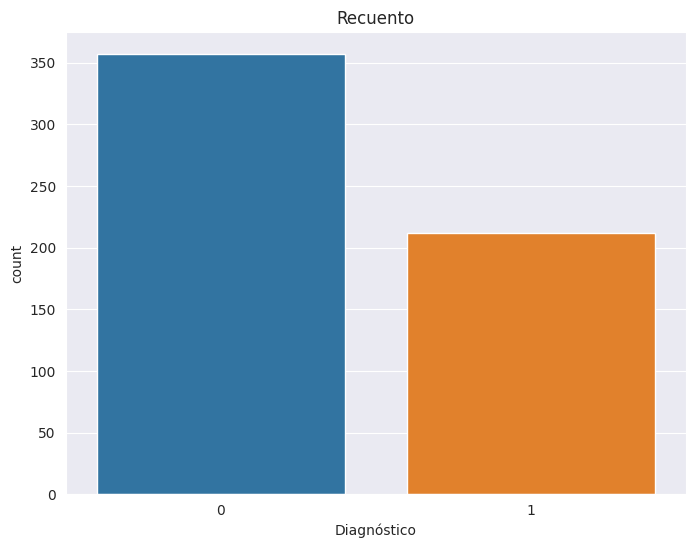

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x = data["diagnóstico"])
plt.xlabel("Diagnóstico")
plt.title("Recuento")

# **EDA**

**Encoding**

In [ ]:
features_mean=list(data.columns[1:11])
#Se separan los datos en función de su diagnóstico
dfM=data[data["diagnóstico"] == 1]
dfB=data[data["diagnóstico"] == 0]

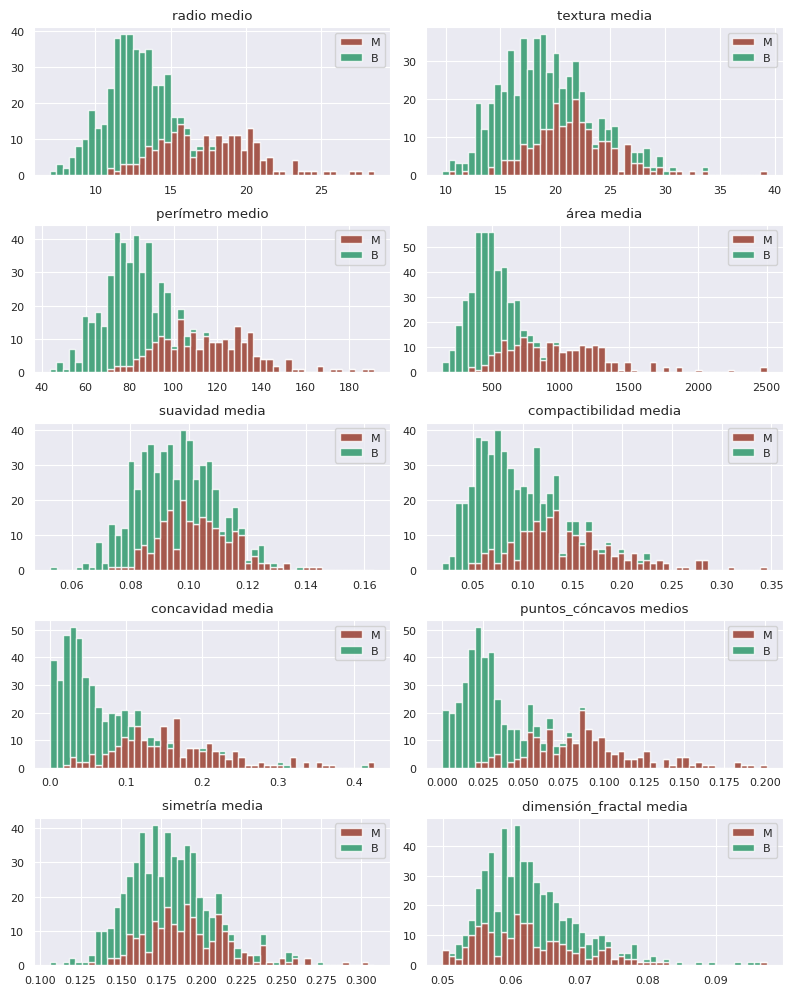

In [ ]:
#Stack the data
plt.rcParams.update({"font.size": 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.8,stacked=True, label=["M","B"],color=["#943424","#239464"])
    ax.legend(loc="upper right")
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [ ]:
x = data["diagnóstico"]
data = data.drop(columns = "diagnóstico")

In [ ]:
data

,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,dimensión_fractal media,...,peor textura,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
scaler = StandardScaler()
scaler.fit(data)

features_scaled = scaler.transform(data)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=data.columns)

df_scaled = pd.concat([features_scaled, x], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
df_scaled

,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,dimensión_fractal media,...,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal,Unnamed: 32,diagnóstico
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,NaN,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,NaN,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,NaN,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,NaN,1


In [ ]:
df_scaled_melt = pd.melt(df_scaled, id_vars="diagnóstico",var_name='features', value_name='value')
df_scaled_melt.head(3)

,diagnóstico,features,value
0,1,radio medio,1.097064
1,1,radio medio,1.829821
2,1,radio medio,1.579888


In [ ]:
df_scaled_melt

,diagnóstico,features,value
0,1,radio medio,1.097064
1,1,radio medio,1.829821
2,1,radio medio,1.579888
3,1,radio medio,-0.768909
4,1,radio medio,1.750297
...,...,...,...
17634,1,Unnamed: 32,NaN
17635,1,Unnamed: 32,NaN
17636,1,Unnamed: 32,NaN
17637,1,Unnamed: 32,NaN


In [ ]:
def violin_plot(features, name):
    #Creación de la consulta
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    #Datos para la visualización
    data1 = df_scaled_melt.query(query)

    #Gráfico
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='diagnóstico',
                   data=data1,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Atributos")
    plt.ylabel("Valor estandarizado")


def swarm_plot(features, name):
    #Creación de la consulta
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    #Datos para la visualización
    data1 = df_scaled_melt.query(query)

    #Gráfico
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='diagnóstico', data=data1)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def box_plot(features, name):
    #Creación de la consulta
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    #Datos para la visualización
    data1 = df_scaled_melt.query(query)

    #Gráfico
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='diagnóstico', data=data1)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")

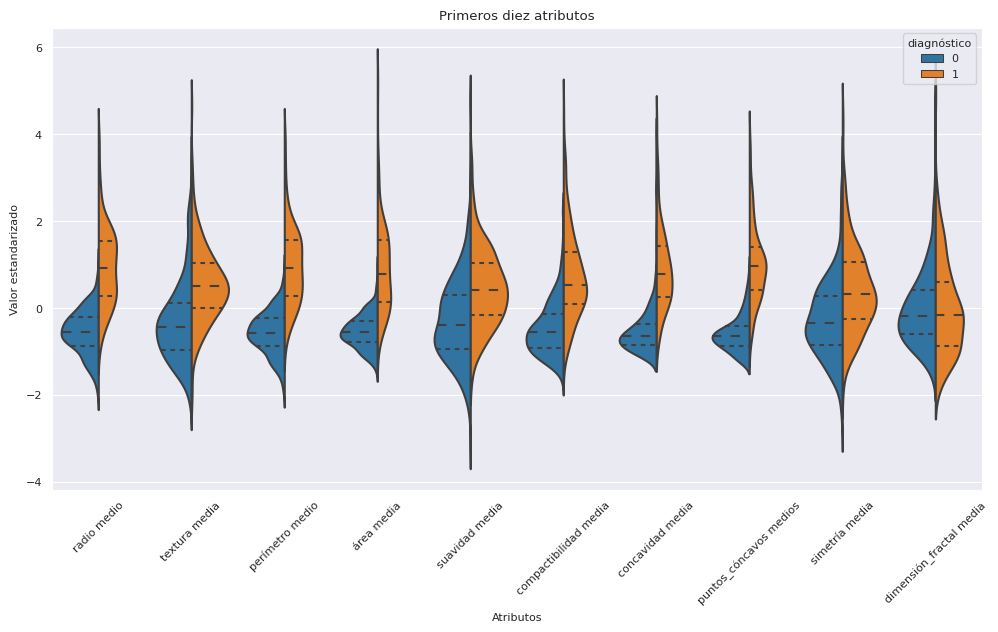

In [ ]:
violin_plot(data.columns[0:10], "Primeros diez atributos")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.9% of the points cannot be plac

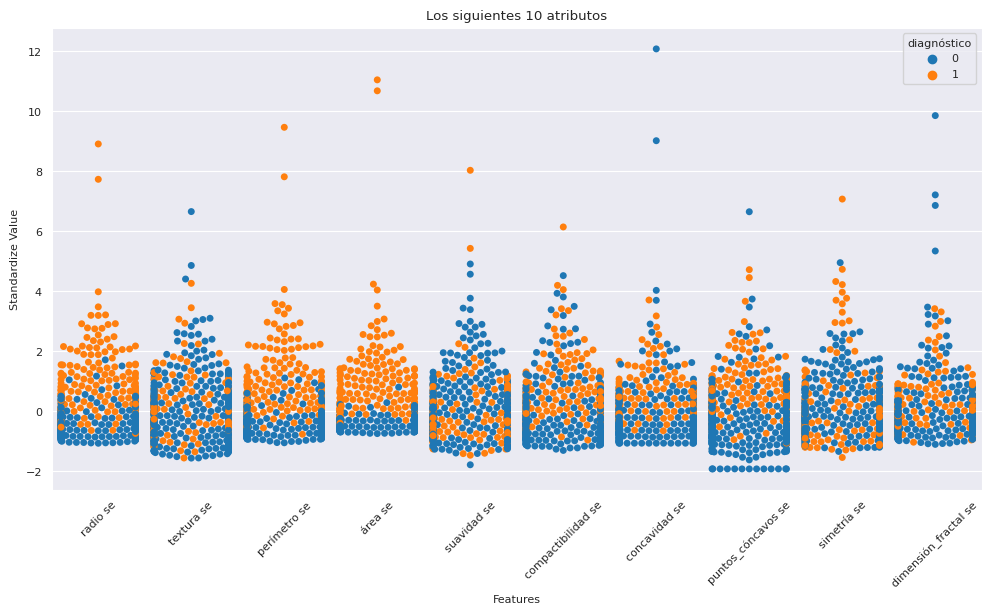

In [ ]:
swarm_plot(data.columns[10:20], "Los siguientes 10 atributos")

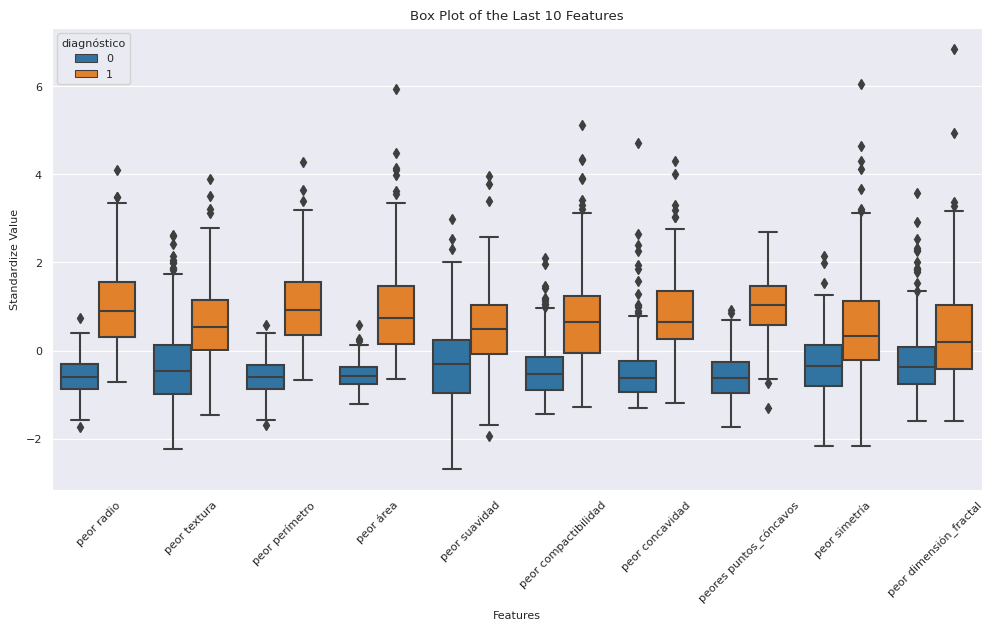

In [ ]:
box_plot(data.columns[20:30], "Box Plot of the Last 10 Features")

In [ ]:
def correlation(var):
    # Print correlation
    print("Correlation: ", data[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(x = data[(var[0])], y = data[(var[1])], kind='reg')

Correlation:  0.9865068039913907


<Figure size 600x600 with 0 Axes>

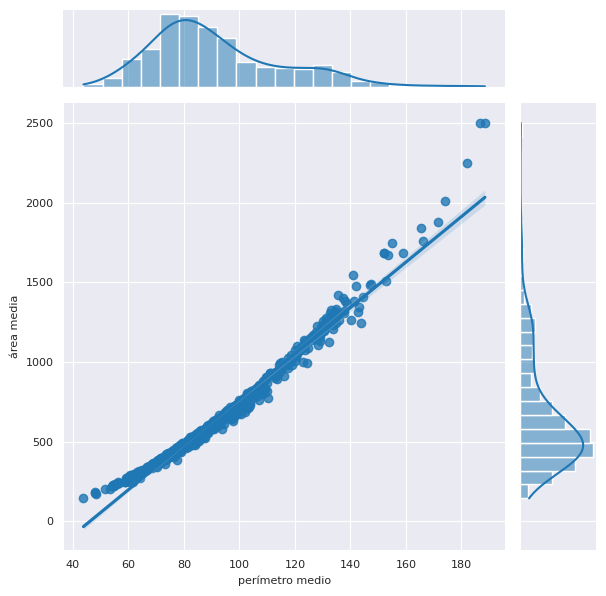

In [ ]:
correlation(['perímetro medio','área media'])

Correlation:  0.9213910263788588


<Figure size 600x600 with 0 Axes>

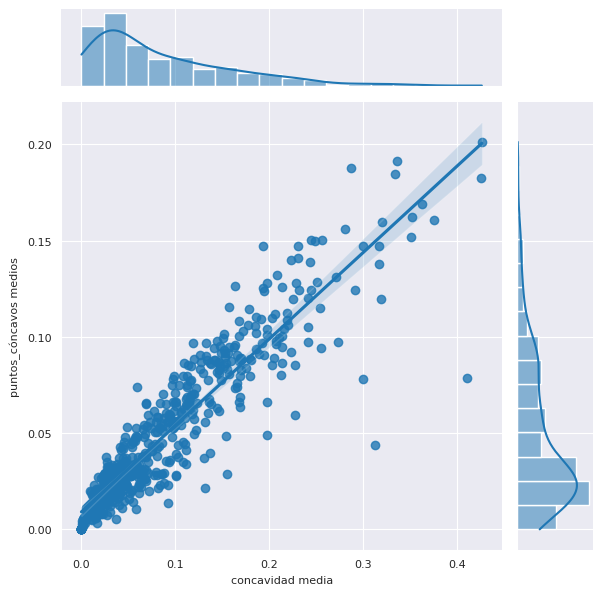

In [ ]:
correlation(["concavidad media","puntos_cóncavos medios"])

Correlation:  0.537848206253609


<Figure size 600x600 with 0 Axes>

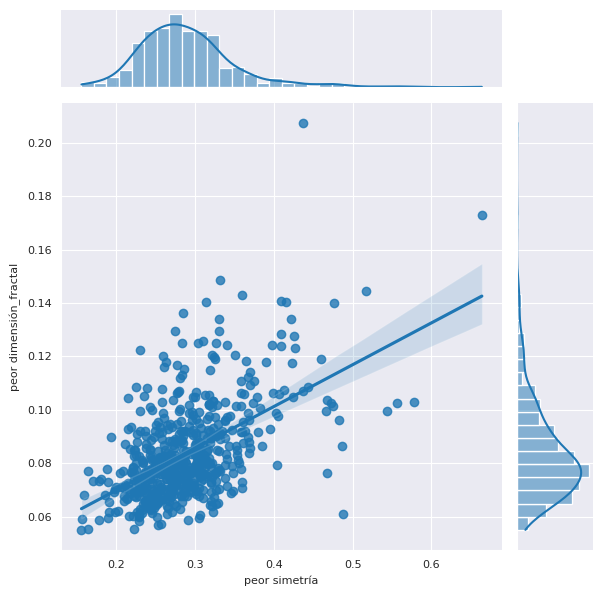

In [ ]:
correlation(["peor simetría", "peor dimensión_fractal"])

<ipython-input-36-e349e18e82e8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


<Axes: >

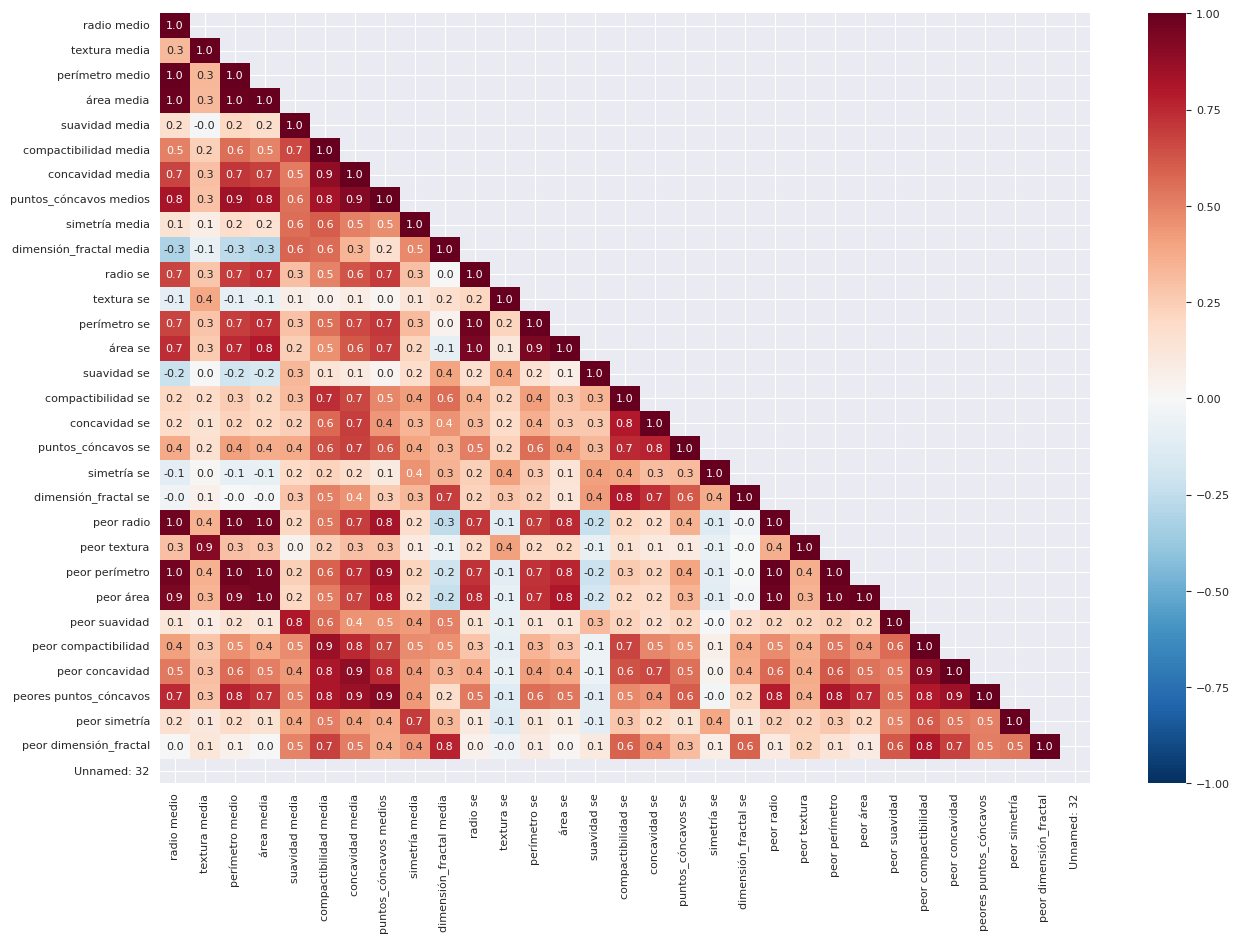

In [ ]:
#Matrix de correlación
corr_mat = data.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

<Axes: >

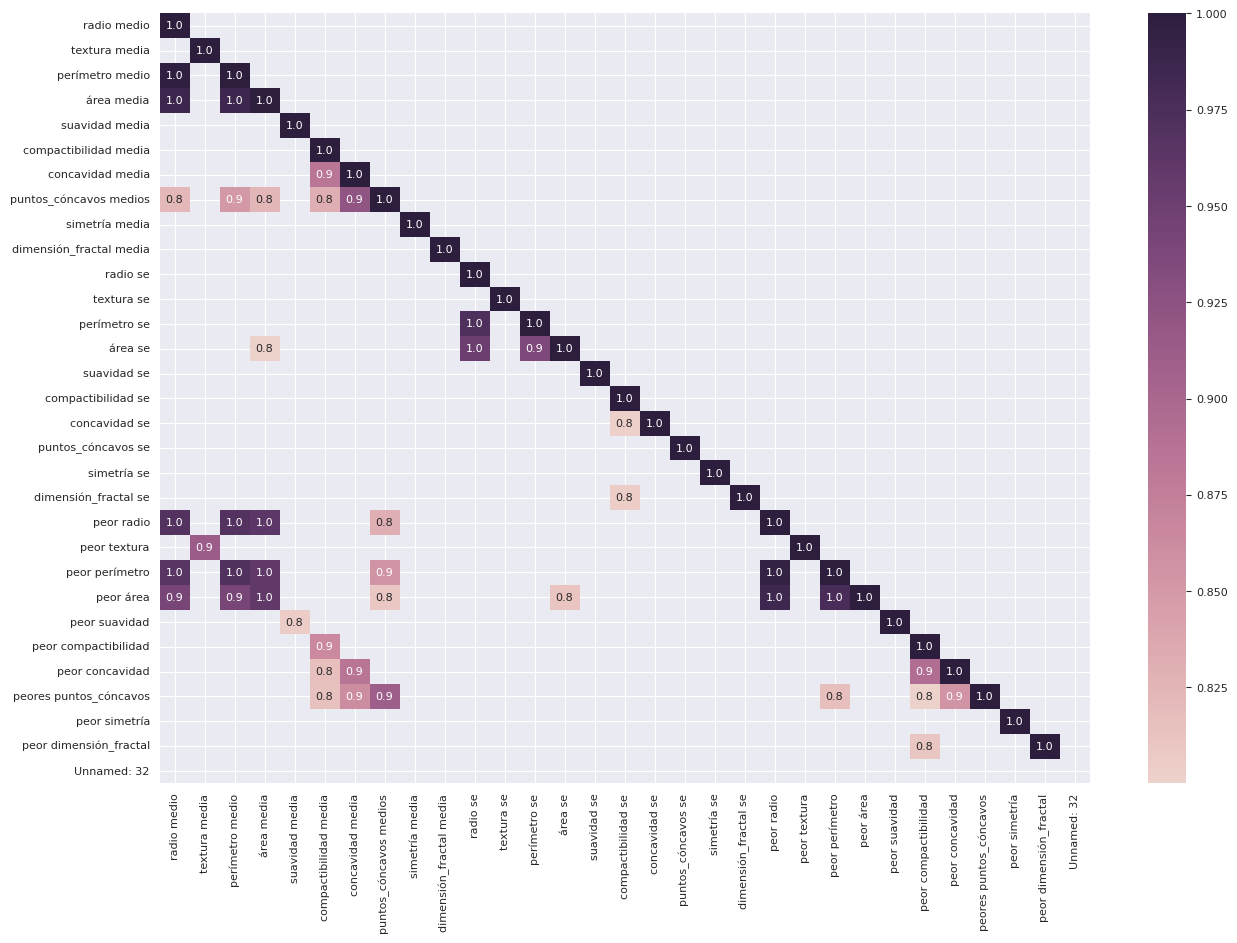

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

In [ ]:
data

,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,dimensión_fractal media,...,peor textura,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **Creación del modelo**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Curso Data Science/Desafío 15/Set de datos/data.csv')

In [ ]:
ata = data.drop(columns = ["id"]) #no es una columna que sirva para el análisis
data.rename(columns = {"diagnosis": "diagnóstico","radius_mean":"radio medio",	"texture_mean":"textura media", "perimeter_mean":"perímetro medio",	"area_mean":"área media",
                       "smoothness_mean":"suavidad media", "compactness_mean":"compactibilidad media",	"concavity_mean":"concavidad media",
                       "concave points_mean":"puntos_cóncavos medios", "symmetry_mean":"simetría media","fractal_dimension_mean":"dimensión_fractal media",
                       "radius_se":"radio se", "texture_se":"textura se", "perimeter_se":"perímetro se",	"area_se":"área se",
                       "smoothness_se":"suavidad se", "compactness_se":"compactibilidad se",	"concavity_se":"concavidad se",
                       "concave points_se":"puntos_cóncavos se", "symmetry_se":"simetría se","fractal_dimension_se":"dimensión_fractal se",
                       "radius_worst":"peor radio","texture_worst":"peor textura", "perimeter_worst":"peor perímetro",	"area_worst":"peor área",
                       "smoothness_worst":"peor suavidad", "compactness_worst":"peor compactibilidad",	"concavity_worst":"peor concavidad",
                       "concave points_worst":"peores puntos_cóncavos", "symmetry_worst":"peor simetría","fractal_dimension_worst":"peor dimensión_fractal",}, inplace = True)

In [ ]:
data["diagnóstico"] = data["diagnóstico"].map({'M':1,'B':0})

In [ ]:
y = data["diagnóstico"]
y = pd.DataFrame(data = y)

In [ ]:
data = data.drop(columns = ["Unnamed: 32", "diagnóstico"])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(data, y)
selected_features = data.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['id', 'área media', 'área se', 'peor perímetro', 'peor área']


In [ ]:
X = pd.DataFrame(feature_selection.transform(data),
                 columns=selected_features)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

<ipython-input-49-d3aa3026f585>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Reporte:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
features_scaled.head(5)

,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,dimensión_fractal media,...,peor textura,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal,Unnamed: 32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN


In [ ]:
X_scaled = features_scaled

In [ ]:
X_scaled = X_scaled.drop(columns = "Unnamed: 32")

In [ ]:
X_scaled

,radio medio,textura media,perímetro medio,área media,suavidad media,compactibilidad media,concavidad media,puntos_cóncavos medios,simetría media,dimensión_fractal media,...,peor radio,peor textura,peor perímetro,peor área,peor suavidad,peor compactibilidad,peor concavidad,peores puntos_cóncavos,peor simetría,peor dimensión_fractal
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0.5, 0, 'Second Principal Component')

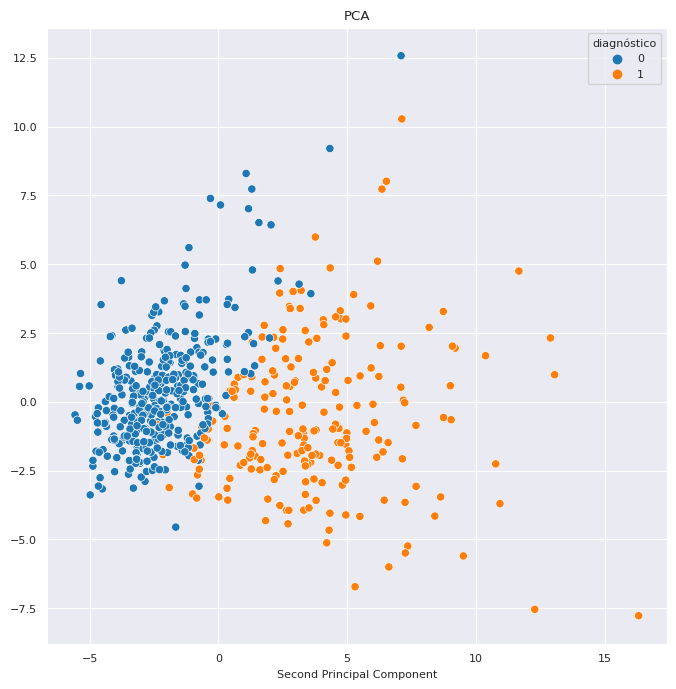

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue=y["diagnóstico"])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.xlabel("Second Principal Component")

In [ ]:
X = X_pca
y = y["diagnóstico"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Reporte:\n",classification_report(y_test, y_pred))

Matriz de confusión:
 [[116   5]
 [  5  62]]


Reporte:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       121
           1       0.93      0.93      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



In [ ]:
#Función genérica para el modelo de clasificación y para evaluar su performance
def classification_model(model, data, predictors, outcome):
  #Modelo:
  model.fit(data[predictors],data[outcome])

  #predicciones en training set:
  predictions = model.predict(data[predictors])

  #Accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #K-fold validación cruzada
  X = np.array(data)
  kf = KFold(n_splits=5, shuffle = True)

  error = []

  for train, test in kf.split(X):
    #Filtro train
    train_predictors = (data[predictors].iloc[train,:])

    #Objetivo
    train_target = data[outcome].iloc[train]

    #Entrenamiento
    model.fit(train_predictors, train_target)

    #Errores
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Ajuste del modelo
  model.fit(data[predictors],data[outcome])

In [ ]:
traindf, testdf = train_test_split(data, test_size = 0.3)

In [ ]:
predictor_var = ["radio medio","perímetro medio","área media","puntos_cóncavos medios","concavidad media"]
outcome_var="diagnóstico"
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

KeyError: ignored

In [ ]:
predictor_var = ["radio medio"]
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

KeyError: ignored